In [1]:
%pylab inline
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


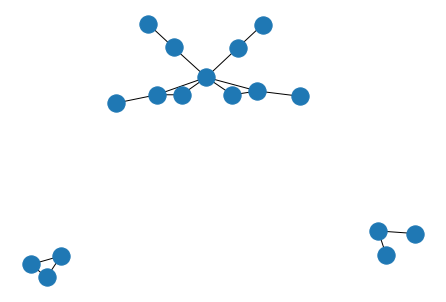

In [17]:
g = nx.Graph()

g.add_edges_from([np.random.randint(0,20, (2)) for _ in range(20)])

nx.draw(g)

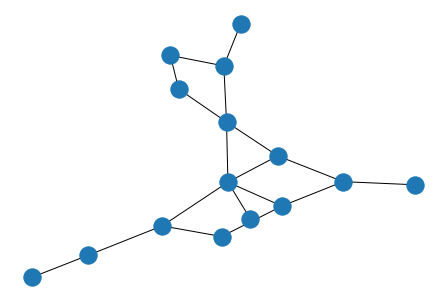

In [57]:
connected = [g.subgraph(c) for c in nx.connected_components(g) if len(c)>4][0]
nx.draw(connected)

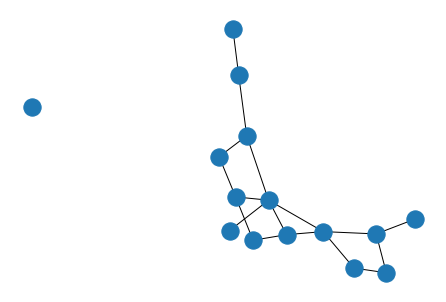

In [58]:
u,v = nx.maximum_(connected).pop()
new_g = nx.Graph(connected)
new_g.remove_edge(u,v)
nx.draw(new_g)

In [1]:
import pandas as pd

In [2]:
'''df = pd.read_csv('/Users/mgbvox/Downloads/2008_BSA_Inpatient_Claims_PUF.csv', encoding='latin1')

df[['IP_CLM_BASE_DRG_CD','IP_DRG_QUINT_PMT_AVG', 'IP_DRG_QUINT_PMT_CD']]

proc_quintile_df = df.groupby(['IP_CLM_BASE_DRG_CD','IP_DRG_QUINT_PMT_CD'])[['IP_DRG_QUINT_PMT_AVG']].mean().T

proc_quintile_df[199][2]

!pip install xlutils
!pip install xlrd

dfs = {}
for year in range(2014,2018):
    path = f'/Users/mgbvox/Downloads/Medicare_Fee-For-Service_Enrollment_by_State_CY{year}.xlsx'
    df = pd.read_excel(path)
    dfs[year] = df


big = pd.read_csv('/Users/mgbvox/Downloads/Medicare_Provider_Util_Payment_PUF_CY2017/Medicare_Provider_Util_Payment_PUF_CY2017.txt', sep='\t')

big.shape

data = big.dropna()

data.to_csv('provider_data.csv')'''
pass

In [3]:
'''
START HERE
'''
import pandas as pd
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [4]:
data = pd.read_csv('provider_data.csv')

/Users/mgbvox/opt/anaconda3/envs/ds/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
code_avgs = data.groupby('hcpcs_code')['average_submitted_chrg_amt'].mean()

In [6]:
sub = data.iloc[:10000]

In [8]:
data['charge_delta'] = data.parallel_apply(lambda x: x.average_submitted_chrg_amt - code_avgs[x.hcpcs_code], axis=1)

In [19]:
import numpy as np
np.save('charge_delta_data.npy', data.charge_delta.values)

In [16]:
data.groupby(['nppes_provider_last_org_name'])['charge_delta'].mean().sort_values()

nppes_provider_last_org_name
OLANSEN     -8196.171113
STEERS      -7789.505504
KOEBEL      -4521.363192
RIGONI      -4326.100490
PARKYN      -4308.933224
                ...     
DOWSE        9579.282935
FALLAS      11109.691313
TINTZMAN    11383.823529
MACHUGH     11853.353250
HOEG        22383.636808
Name: charge_delta, Length: 90664, dtype: float64

In [15]:
'''
Look at how doctors are clustering/not clustering around different procedures;
Weight edges by avg procedure pricing for that doctor
For nodes of high clustering:
    1) Find edge weight outliers
    2) See if doctors with those outliers are charging similarly high prices in other clusters.
'''

,Unnamed: 0,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,...,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,charge_delta
0,12,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Pathology examination of tissue using a micros...,N,268.0,249.0,252.0,12.789739,115.000000,9.842127,9.390821,13.275450
1,13,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Pathology examination of tissue using a micros...,N,6162.0,3481.0,4489.0,41.299942,170.000000,31.426415,30.401900,2.429932
2,14,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Special stained specimen slides to identify or...,N,438.0,289.0,294.0,29.240251,88.000000,22.700525,22.163379,-29.683436
3,15,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Special stained specimen slides to examine tis...,N,86.0,63.0,65.0,13.137558,68.000000,10.298140,9.849535,-10.664176
4,16,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Surgical pathology consultation and report,N,27.0,27.0,27.0,92.750000,273.555556,67.333333,64.083333,-14.866870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3238,1003017682,AKHTAR,NAUMAN,J,M.D.,M,I,224D CORNWALL ST NW,SUITE 204,...,Computer-assisted surgical navigational proced...,N,41.0,40.0,41.0,149.800000,343.000000,117.440000,119.860000,-367.158056
996,3239,1003017682,AKHTAR,NAUMAN,J,M.D.,M,I,224D CORNWALL ST NW,SUITE 204,...,Replacement of thigh bone and hip joint prosth...,N,22.0,21.0,22.0,1376.500000,4067.000000,1072.658182,1093.908636,-1042.807561
997,3240,1003017682,AKHTAR,NAUMAN,J,M.D.,M,I,224D CORNWALL ST NW,SUITE 204,...,Open treatment of broken thigh bone with inser...,N,17.0,17.0,17.0,1177.808824,3126.000000,923.398235,941.616471,-551.421702
998,3241,1003017682,AKHTAR,NAUMAN,J,M.D.,M,I,224D CORNWALL ST NW,SUITE 204,...,Surgical treatment of broken thigh bone,N,13.0,13.0,13.0,1248.950000,3824.000000,979.180000,997.078462,-674.525719


In [37]:
similarSpecialtyDescrs = [("Dentist", "Oral & Maxillofacial Surgery"),
                          ("Radiology", "Radiologic Technologist"),
                          ("Assistant, Podiatric", "Podiatrist"),
                          ("Ophthalmology", "Optometrist"),
                          ("Physical Therapist", "Massage Therapist", "Physical Therapy Assistant",\
                           "Mechanotherapist", "Rehabilitation Practitioner", "Rehabilitation Hospital", "Chiropractor"),
                          ("Psychiatric Unit", "Psychoanalyst", "Psychiatric Hospital", "Psychiatry & Neurology", "Psychologist", "Behavioral Analyst"),
                          ("Pathology", "Technician, Pathology", "Spec/Tech, Pathology"),
                          ("Pain Medicine", "Nurse Anesthetist, Certified Registered",\
                           "Anesthesiologist Assistant", "Anesthesiology")]


specialty_map = dict()
for t in similarSpecialtyDescrs:
    first = t[0]
    remainder = t[1:]
    for val in remainder:
        specialty_map[val] = first

{'Oral & Maxillofacial Surgery': 'Dentist',
 'Radiologic Technologist': 'Radiology',
 'Podiatrist': 'Assistant, Podiatric',
 'Optometrist': 'Ophthalmology',
 'Massage Therapist': 'Physical Therapist',
 'Physical Therapy Assistant': 'Physical Therapist',
 'Mechanotherapist': 'Physical Therapist',
 'Rehabilitation Practitioner': 'Physical Therapist',
 'Rehabilitation Hospital': 'Physical Therapist',
 'Chiropractor': 'Physical Therapist',
 'Psychoanalyst': 'Psychiatric Unit',
 'Psychiatric Hospital': 'Psychiatric Unit',
 'Psychiatry & Neurology': 'Psychiatric Unit',
 'Psychologist': 'Psychiatric Unit',
 'Behavioral Analyst': 'Psychiatric Unit',
 'Technician, Pathology': 'Pathology',
 'Spec/Tech, Pathology': 'Pathology',
 'Nurse Anesthetist, Certified Registered': 'Pain Medicine',
 'Anesthesiologist Assistant': 'Pain Medicine',
 'Anesthesiology': 'Pain Medicine'}

In [38]:
def consolidate_specialties(s):
    if specialty_map.get(s):
        return specialty_map[s]
    return s

In [21]:
specialtyDescrs = ["Dermatology", "Otolaryngology", "Plastic Surgery", "Ophthalmology",
                   "Radiology", "Pathology",  "Physical Therapist" ]

In [23]:
paper_data = data[['npi','provider_type','hcpcs_code','bene_day_srvc_cnt']]

In [39]:
paper_data['provider_type'] = paper_data.provider_type.parallel_apply(consolidate_specialties)

/Users/mgbvox/opt/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
def in_desc(x):
    try:
        b = x in specialtyDescrs
        return b
    except:
        return False

In [45]:
provider_data = paper_data[paper_data['provider_type'].parallel_apply(in_desc)]

In [51]:
provider_data

,npi,provider_type,hcpcs_code,bene_day_srvc_cnt
0,1003000134,Pathology,88304,252.0
1,1003000134,Pathology,88305,4489.0
2,1003000134,Pathology,88312,294.0
3,1003000134,Pathology,88313,65.0
4,1003000134,Pathology,88321,27.0
...,...,...,...,...
2877784,1992999825,Otolaryngology,99203,88.0
2877785,1992999825,Otolaryngology,99204,83.0
2877786,1992999825,Otolaryngology,99204,105.0
2877787,1992999825,Otolaryngology,99214,103.0


In [67]:
provider_data['provider_type_oh'] = pd.get_dummies(provider_data.provider_type).parallel_apply(lambda x: np.array(x), axis=1)
provider_data['hcpcs_code_oh'] = pd.get_dummies(provider_data.hcpcs_code).parallel_apply(lambda x: np.array(x), axis=1)


/Users/mgbvox/opt/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/Users/mgbvox/opt/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
procedures_by_discipline = provider_data.groupby('provider_type')['hcpcs_code'].unique()

In [114]:
def sum_oh(g):
    return np.stack(g, axis=0).sum(0)

In [121]:
cpi_vec = provider_data.groupby('npi')['hcpcs_code_oh'].apply(sum_oh)

In [136]:
from sklearn.metrics.pairwise import cosine_similarity

In [155]:
sims = cosine_similarity(pd.DataFrame(np.stack(cpi_vec.values, 0)))

In [157]:
cpi_vec.reset_index()

,npi,hcpcs_code_oh
0,1003000134,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1003001017,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1003004540,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1003005109,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1003005257,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
17700,1992982094,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
17701,1992995542,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
17702,1992996201,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
17703,1992997548,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [160]:
similar_doc_idxs = np.where(sims > .8)

In [181]:
edges = np.array(list(zip(*similar_doc_idxs)))

In [202]:
idxs = np.random.choice(len(edges), 1000)

r_edgs = edges[idxs]

In [203]:
import networkx as nx

g = nx.Graph()

g.add_edges_from(r_edgs)



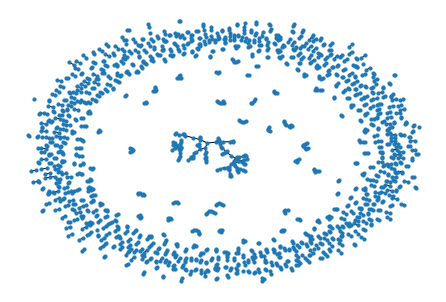

In [204]:
nx.draw(g, node_size=10)